In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e23/sample_submission.csv
/kaggle/input/playground-series-s3e23/train.csv
/kaggle/input/playground-series-s3e23/test.csv


# IMPORTING BASIC LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import RandomizedSearchCV

In [3]:
train_df = pd.read_csv('/kaggle/input/playground-series-s3e23/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s3e23/test.csv')

# Data Exploration

In [4]:
train_df

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,101758,10.0,2.0,1.0,1.0,28.0,122.98,0.15,6.60,18.63,...,7,0,1,0,11.0,8.0,16.0,12.0,3.0,False
101759,101759,27.0,5.0,4.0,1.0,107.0,559.93,0.06,18.00,34.17,...,23,0,2,0,18.0,20.0,67.0,40.0,9.0,False
101760,101760,26.0,1.0,1.0,1.0,83.0,360.17,0.04,22.75,12.56,...,20,0,4,0,10.0,8.0,51.0,28.0,1.0,False
101761,101761,10.0,2.0,1.0,2.0,43.0,191.76,0.15,6.46,29.53,...,7,0,1,0,11.0,14.0,24.0,19.0,3.0,False


In [5]:
train_df.describe()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,...,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,50881.000000,37.347160,5.492684,2.845022,3.498826,96.655995,538.280956,0.111634,13.681881,27.573007,...,1141.357982,22.802453,1.773945,3.979865,0.196604,11.896131,15.596671,57.628116,39.249698,9.839549
std,29376.592059,54.600401,7.900855,4.631262,5.534541,171.147191,1270.791601,0.100096,14.121306,22.856742,...,9862.795472,38.541010,5.902412,6.382358,0.998906,6.749549,18.064261,104.537660,71.692309,14.412769
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25440.500000,13.000000,2.000000,1.000000,1.000000,25.000000,97.670000,0.050000,5.600000,15.560000,...,31.380000,7.000000,0.000000,1.000000,0.000000,8.000000,7.000000,15.000000,10.000000,3.000000
50%,50881.000000,22.000000,3.000000,1.000000,2.000000,51.000000,232.790000,0.090000,9.820000,23.360000,...,125.400000,14.000000,0.000000,2.000000,0.000000,11.000000,12.000000,30.000000,20.000000,5.000000
75%,76321.500000,42.000000,6.000000,3.000000,4.000000,111.000000,560.250000,0.150000,18.000000,34.340000,...,565.920000,26.000000,1.000000,5.000000,0.000000,16.000000,20.000000,66.000000,45.000000,11.000000
max,101762.000000,3442.000000,404.000000,165.000000,402.000000,8441.000000,80843.080000,1.000000,418.200000,569.780000,...,935923.390000,2824.000000,344.000000,219.000000,43.000000,410.000000,1026.000000,5420.000000,3021.000000,503.000000


In [6]:
test_df.describe()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,...,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000
mean,135683.500000,37.855945,5.559462,2.857699,3.535715,98.222178,548.422497,0.111521,13.762472,27.635377,...,1218.682009,23.131924,1.832493,4.020739,0.200834,11.909776,15.678370,58.325212,39.845258,9.985923
std,19584.442818,55.793918,8.237389,4.666370,5.339085,179.123492,1318.416828,0.100840,14.487425,23.420521,...,10739.081373,39.606659,6.229052,7.136069,1.044581,6.974254,17.979368,105.491447,72.756320,15.342975
min,101763.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,118723.250000,13.000000,2.000000,1.000000,1.000000,25.000000,96.210000,0.040000,5.500000,15.540000,...,31.270000,7.000000,0.000000,1.000000,0.000000,8.000000,7.000000,15.000000,10.000000,3.000000
50%,135683.500000,22.000000,3.000000,1.000000,2.000000,51.000000,232.790000,0.090000,9.820000,23.230000,...,126.490000,14.000000,0.000000,2.000000,0.000000,12.000000,12.000000,30.000000,20.000000,5.000000
75%,152643.750000,42.000000,6.000000,3.000000,4.000000,111.000000,560.250000,0.140000,18.000000,34.270000,...,561.802500,26.000000,1.000000,5.000000,0.000000,16.000000,20.000000,66.000000,44.000000,11.000000
max,169604.000000,1891.000000,470.000000,165.000000,402.000000,8441.000000,80843.080000,1.000000,418.200000,569.780000,...,935923.390000,1599.000000,344.000000,447.000000,42.000000,411.000000,1026.000000,3368.000000,2301.000000,826.000000


In [7]:
train_df.dtypes

id                     int64
loc                  float64
v(g)                 float64
ev(g)                float64
iv(g)                float64
n                    float64
v                    float64
l                    float64
d                    float64
i                    float64
e                    float64
b                    float64
t                    float64
lOCode                 int64
lOComment              int64
lOBlank                int64
locCodeAndComment      int64
uniq_Op              float64
uniq_Opnd            float64
total_Op             float64
total_Opnd           float64
branchCount          float64
defects                 bool
dtype: object

In [8]:
test_df.dtypes

id                     int64
loc                  float64
v(g)                 float64
ev(g)                float64
iv(g)                float64
n                    float64
v                    float64
l                    float64
d                    float64
i                    float64
e                    float64
b                    float64
t                    float64
lOCode                 int64
lOComment              int64
lOBlank                int64
locCodeAndComment      int64
uniq_Op              float64
uniq_Opnd            float64
total_Op             float64
total_Opnd           float64
branchCount          float64
dtype: object

In [9]:
X = train_df.drop(['id','defects'],axis = 1)
y = train_df['defects']

<Axes: xlabel='defects', ylabel='Density'>

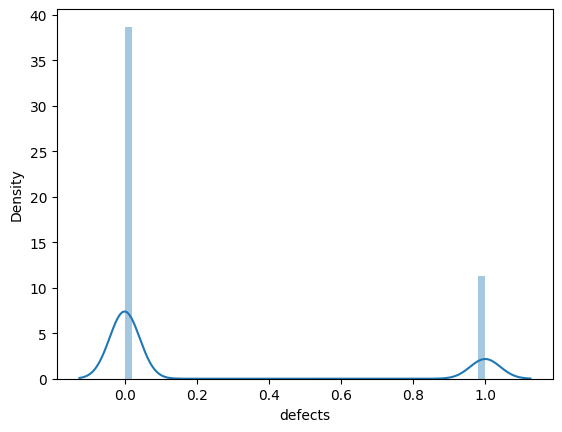

In [10]:
sns.distplot(y)

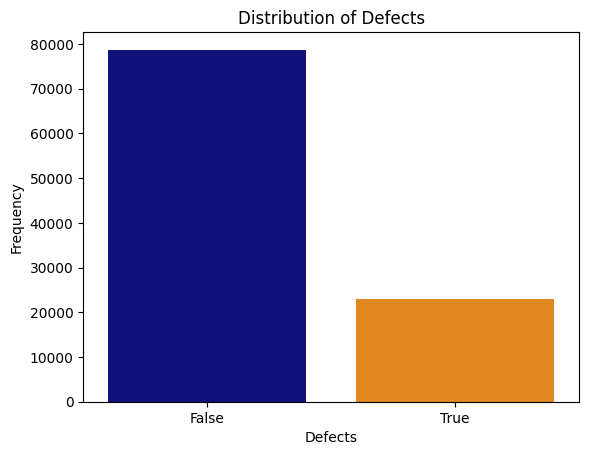

In [11]:
# Define a custom color palette for the three categories
custom_palette = ["darkblue", "darkorange"]

## Create count plot of the distribution of defects
sns.countplot(data=train_df, x='defects', palette=custom_palette)
plt.ylabel('Frequency')
plt.xlabel('Defects')
plt.title('Distribution of Defects')
plt.show()

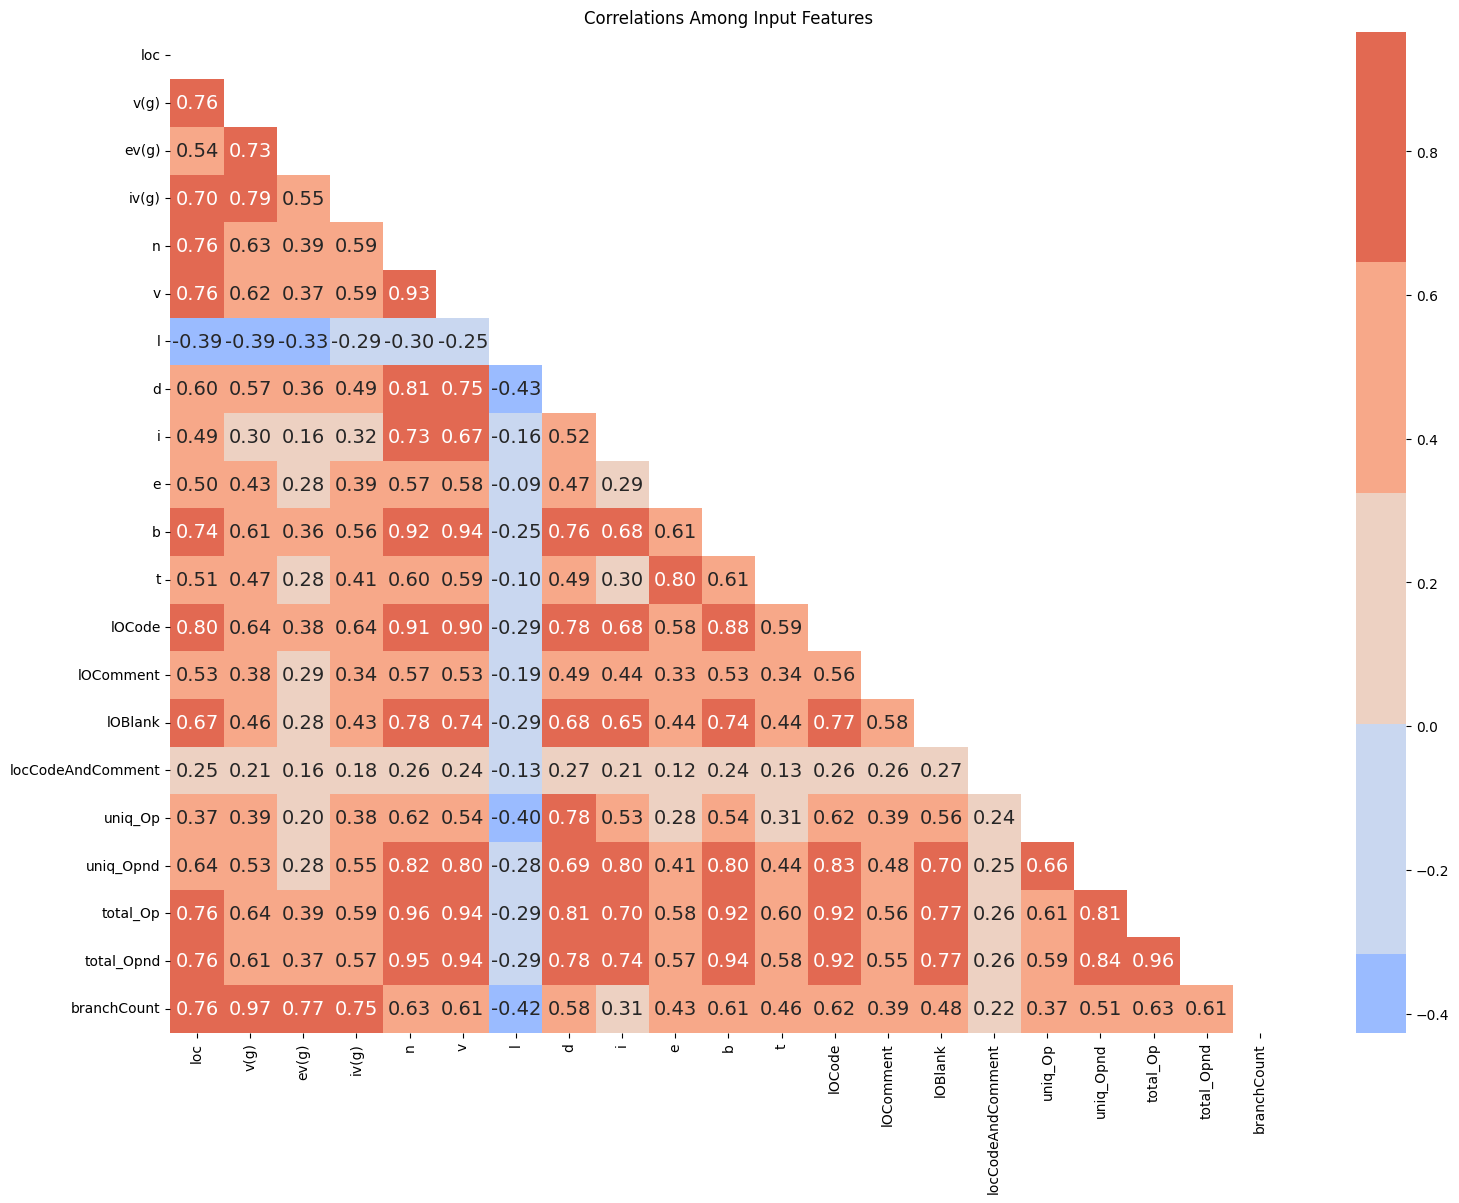

In [12]:
## create heat map among input features
corr_mat = train_df.drop(columns=['id', 'defects'], axis=1).corr()

data_mask = np.triu(np.ones_like(corr_mat, dtype=bool))
cmap = sns.color_palette("coolwarm") 
f, ax = plt.subplots(figsize=(18, 13))
sns.heatmap(corr_mat, annot=True, cmap=cmap, fmt='.2f', center=0,
            annot_kws={'size': 14}, mask=data_mask).set_title('Correlations Among Input Features');


**From the above plot you can see:**
* The data reveals a robust and positive 97% correlation between the variables branchCount and v(g).

* There is a highly significant 96% positive correlation between total_Opnd and total_Op, indicating a strong relationship between these two features.

* Additionally, a substantial 96% positive correlation is observed between total_Op and the variable n, suggesting a close association between these variables.

* Notably, the feature "l" exhibits a unique and negative correlation with the other features, making it an interesting outlier in the dataset.

In [13]:
test_df = test_df.drop(['id'],axis = 1)
train_df = train_df.drop(['id'],axis = 1)

# Feature Selection

# Splitting the Train_df in train test

In [14]:
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=1)

# Scaling the Data

In [15]:
scaler = StandardScaler()

In [16]:
X_train_scaled = scaler.fit_transform(X_train)

In [17]:
X_train_scaled = pd.DataFrame(X_train_scaled , columns=scaler.get_feature_names_out())

In [18]:
X_test_scaled = scaler.transform(X_test)

In [19]:
X_test_scaled = pd.DataFrame(X_test_scaled , columns=scaler.get_feature_names_out())

In [20]:
test_df_scaled = scaler.transform(test_df)

In [21]:
test_df_scaled = pd.DataFrame(test_df_scaled, columns=scaler.get_feature_names_out())

In [22]:
test_df_scaled

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,-0.078337,-0.061651,-0.397864,0.098180,0.276942,0.224801,-0.715994,0.941120,0.108469,0.011415,...,0.015741,0.188165,-0.297018,-0.152276,-0.197203,1.366067,0.415407,0.282100,0.248909,-0.056915
1,-0.188566,0.327893,1.111873,-0.281050,0.166177,0.085093,-0.715994,0.648009,-0.015109,-0.033599,...,-0.034335,0.006298,-0.297018,-0.308024,-0.197203,0.916113,0.191678,0.119461,0.137249,0.364759
2,1.703704,0.717437,0.896196,1.235869,2.614654,2.576933,-0.916170,2.441367,1.685727,0.527685,...,0.590070,1.980856,1.221704,2.028197,0.803815,2.115991,2.093375,2.635575,2.858952,0.786432
3,0.509553,0.198045,-0.397864,0.667024,0.346898,0.248968,-0.515818,0.252238,0.974825,-0.024474,...,-0.024183,0.577880,1.052957,0.937961,-0.197203,0.466158,0.583204,0.291667,0.290781,0.224201
4,-0.280424,-0.321347,-0.397864,-0.091435,-0.259391,-0.233956,-0.115466,-0.287964,-0.037816,-0.099057,...,-0.107155,-0.175570,-0.297018,0.003472,-0.197203,0.016203,-0.032051,-0.263217,-0.211687,-0.338030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67837,0.068636,-0.581043,-0.397864,-0.470664,0.166177,0.093159,-0.415730,0.023555,0.875264,-0.066003,...,-0.070285,0.214146,-0.297018,0.470717,-0.197203,0.316173,0.639136,0.129028,0.207036,-0.619145
67838,-0.317167,-0.321347,-0.397864,-0.091435,-0.341007,-0.294195,0.384974,-0.489743,-0.187158,-0.107689,...,-0.116757,-0.201551,-0.297018,-0.152276,-0.197203,-0.433751,-0.311713,-0.330186,-0.337304,-0.338030
67839,-0.243681,-0.451195,-0.397864,-0.281050,-0.259391,-0.232720,-0.015378,-0.330444,-0.039126,-0.101621,...,-0.110007,-0.123608,-0.297018,0.003472,-0.197203,0.616143,0.023881,-0.205816,-0.295432,-0.478588
67840,-0.353910,-0.451195,-0.397864,-0.470664,-0.276880,-0.250995,-0.015378,-0.307080,-0.154844,-0.101852,...,-0.110264,-0.279494,-0.297018,-0.308024,-0.197203,-0.583736,-0.199848,-0.272784,-0.239602,-0.478588


# Model Building

In [23]:
classifier = LogisticRegression()

In [24]:
classifier.fit(X_train_scaled,y_train)

LogisticRegression()

In [25]:
parameters = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Adjust the range as needed
    'fit_intercept': [True, False],  # Whether to fit the intercept or not
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Different solvers for optimization
}

In [26]:
random_clf=RandomizedSearchCV(classifier,param_distributions=parameters,cv=5)

In [27]:
random_clf.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'fit_intercept': [True, False],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']})

In [28]:
random_clf.best_params_

{'solver': 'newton-cg', 'penalty': 'none', 'fit_intercept': True, 'C': 0.01}

In [29]:
classifier = LogisticRegression(solver='newton-cg',penalty='l2',fit_intercept= True,C = 100)

In [30]:
classifier.fit(X_train_scaled,y_train)

LogisticRegression(C=100, solver='newton-cg')

In [31]:
## prediction
y_pred = classifier.predict(X_test_scaled)

In [32]:
y_pred

array([ True, False, False, ...,  True, False,  True])

In [33]:
y_test

78020     True
24973    False
27486    False
46692    False
19513     True
         ...  
41928    False
56067    False
10356     True
90904    False
21362    False
Name: defects, Length: 20353, dtype: bool

# Confusion matrix,accuracy score,classification report

In [34]:
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[15125  3410]
 [  539  1279]]
0.8059745492065051
              precision    recall  f1-score   support

       False       0.97      0.82      0.88     18535
        True       0.27      0.70      0.39      1818

    accuracy                           0.81     20353
   macro avg       0.62      0.76      0.64     20353
weighted avg       0.90      0.81      0.84     20353



In [35]:
classifier.score(X_train_scaled,y_train)

0.8089423903697335

In [36]:
probabilities = classifier.predict_proba(test_df_scaled)

In [37]:
probabilities


array([[0.75160242, 0.24839758],
       [0.78493328, 0.21506672],
       [0.41660451, 0.58339549],
       ...,
       [0.83236927, 0.16763073],
       [0.86681076, 0.13318924],
       [0.39976021, 0.60023979]])

In [38]:
# Classify based on the threshold
predictions = probabilities[:, 1]

In [39]:
predictions

array([0.24839758, 0.21506672, 0.58339549, ..., 0.16763073, 0.13318924,
       0.60023979])

In [40]:
sample_submission= pd.read_csv('/kaggle/input/playground-series-s3e23/sample_submission.csv')

In [41]:
sample_submission.head(5)

,id,defects
0,101763,0.5
1,101764,0.5
2,101765,0.5
3,101766,0.5
4,101767,0.5


In [42]:
sample_submission['defects'] = predictions

In [43]:
sample_submission.head(5)

,id,defects
0,101763,0.248398
1,101764,0.215067
2,101765,0.583395
3,101766,0.368990
4,101767,0.164830


In [44]:
sample_submission.reset_index(drop=True, inplace=True)
sample_submission.to_csv('sample_submission.csv',index = False)